# **Video Game Sales**
#### **Group Members:** 
- Devanshi Joshi 
- Aneesh Krishna
- Kosisochukwu Ibe

---

In [ ]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

### **Finding and Loading the Dataset**

In [23]:
df = pd.read_csv('vgsales.csv/vgsales.csv')

In [24]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### **Pre-processing the data**

### Missing Values

In [25]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Exploring the dataset

In [26]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [27]:
df[df['Year'].isna() & df['Publisher'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
5302,5304,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,NaN,Action,NaN,0.15,0.05,0.14,0.01,0.35
6272,6274,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,NaN,Action,NaN,0.00,0.00,0.27,0.01,0.27
7351,7353,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,NaN,0.10,0.08,0.00,0.03,0.21
9749,9751,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,NaN,0.00,0.00,0.12,0.00,0.12
10494,10496,Atsumare! Power Pro Kun no DS Koushien,DS,NaN,Sports,NaN,0.00,0.00,0.10,0.00,0.10
11076,11078,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0.00,0.01,0.09
12487,12489,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0.00,0.00,0.06,0.00,0.06


In [28]:
df.dropna(subset=['Year','Publisher'],inplace=True)

In [29]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### **Visualization**

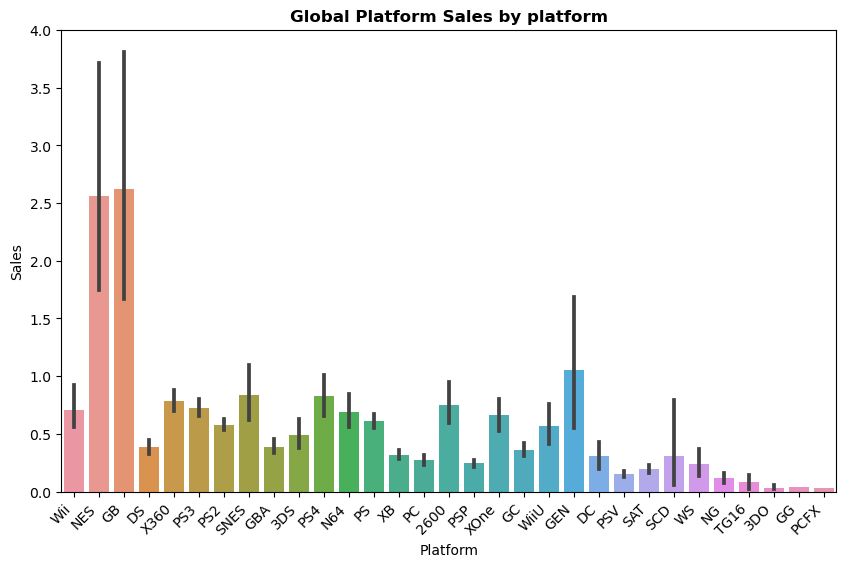

In [55]:
plt.figure(figsize=(10, 6))
sb.barplot(x='Platform', y='Global_Sales', data=df)
plt.title('Global Platform Sales by platform',fontweight='bold')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

> #### GB and NES games has had the most sales compared to the other platform

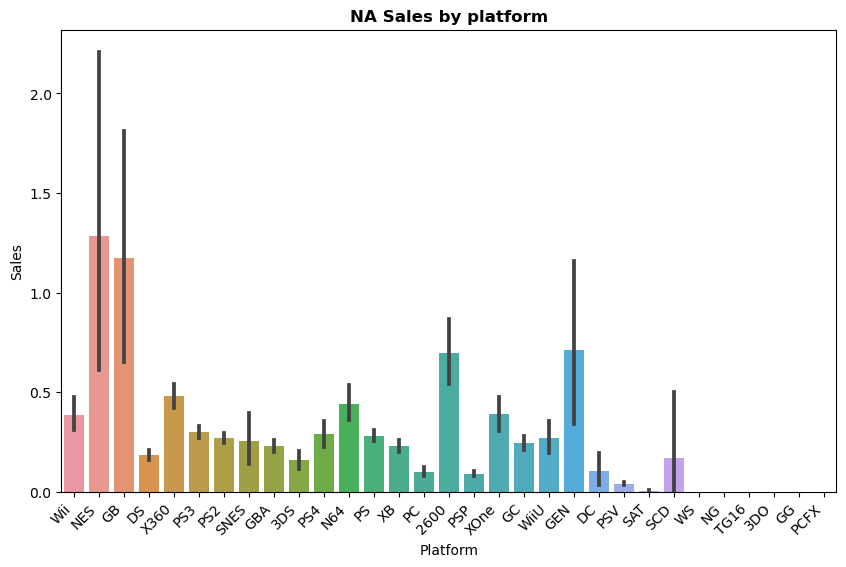

In [56]:
plt.figure(figsize=(10, 6))
sb.barplot(x='Platform', y='NA_Sales', data=df)
plt.title('NA Sales by platform',fontweight='bold')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

> #### In North America, NES platform is the highest game sales

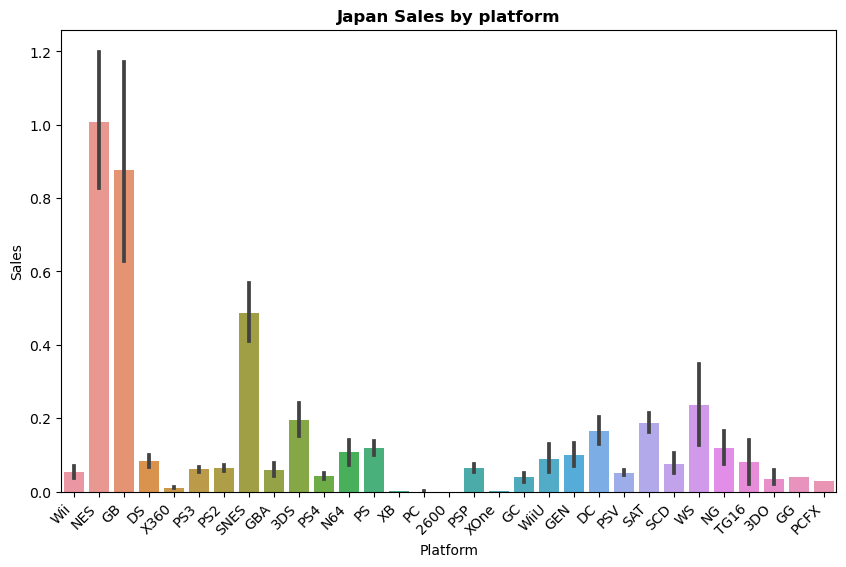

In [57]:
plt.figure(figsize=(10, 6))
sb.barplot(x='Platform', y='JP_Sales', data=df)
plt.title('Japan Sales by platform',fontweight='bold')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

> #### In Japan, NES & GB are clearly the most popular platforms to game in

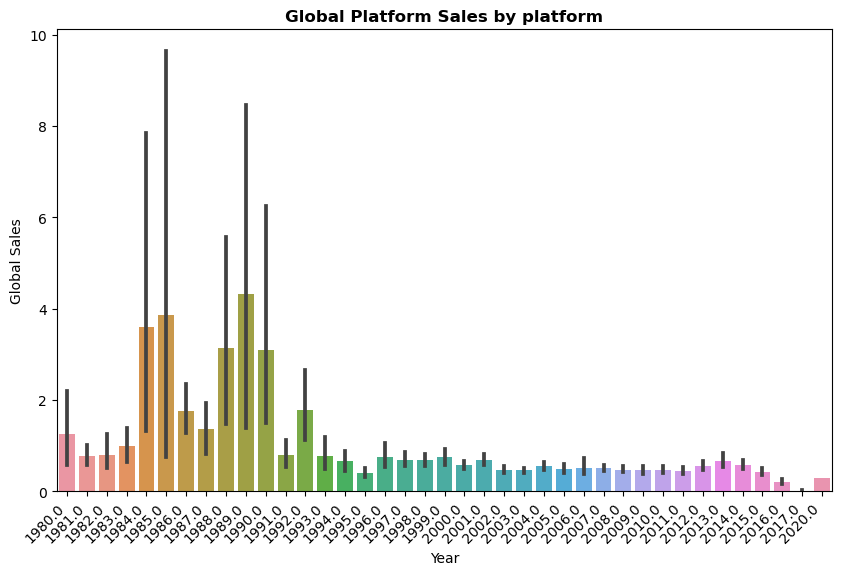

In [58]:
plt.figure(figsize=(10, 6))
sb.barplot(x='Year', y='Global_Sales', data=df)
plt.title('Global Platform Sales by platform',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

> #### The sales of video games were the highest in the year 1989, followed by 1985, these trends were not seen there after  

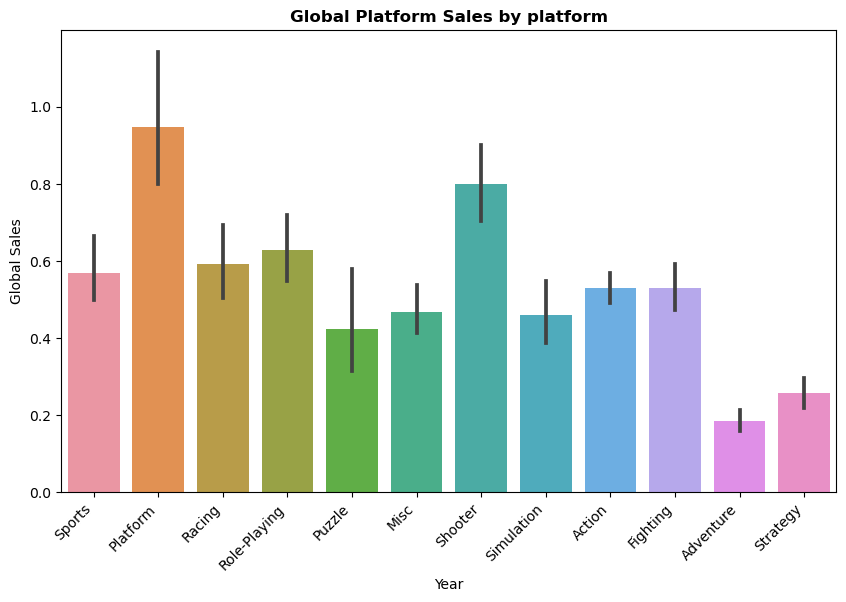

In [60]:
plt.figure(figsize=(10, 6))
sb.barplot(x='Genre', y='Global_Sales', data=df)
plt.title('Global Platform Sales by platform',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

> #### Platform sales were the highest in compared to other game generes. Shooter games had the 2nd highest popularity.

### **Scaling the values using the Min-max Scaler**

In [30]:
scaler = MinMaxScaler()
# stringColumns = df[['Name','Genre','Platform','Publisher']]
df_to_scale = df.drop(columns=['Name','Genre','Platform','Publisher'])

df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)
display(df_scaled)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.000000,0.650,1.000000,1.000000,0.368885,0.800378,1.000000
1,0.000060,0.125,0.700892,0.123363,0.666341,0.072848,0.486281
2,0.000120,0.700,0.382020,0.443832,0.370841,0.313150,0.432854
3,0.000181,0.725,0.379610,0.379394,0.320939,0.280038,0.398767
4,0.000241,0.400,0.271632,0.306340,1.000000,0.094607,0.379064
...,...,...,...,...,...,...,...
16286,0.999759,0.550,0.000241,0.000000,0.000000,0.000000,0.000000
16287,0.999819,0.575,0.000241,0.000000,0.000000,0.000000,0.000000
16288,0.999880,0.700,0.000000,0.000000,0.000000,0.000000,0.000000
16289,0.999940,0.750,0.000000,0.000345,0.000000,0.000000,0.000000


In [31]:
# final = pd.concat([stringColumns,df_scaled],axis=1)

In [32]:
nonNumerical = df[['Name', 'Genre', 'Platform', 'Publisher']]
display(nonNumerical)

,Name,Genre,Platform,Publisher
0,Wii Sports,Sports,Wii,Nintendo
1,Super Mario Bros.,Platform,NES,Nintendo
2,Mario Kart Wii,Racing,Wii,Nintendo
3,Wii Sports Resort,Sports,Wii,Nintendo
4,Pokemon Red/Pokemon Blue,Role-Playing,GB,Nintendo
...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Platform,GBA,Kemco
16594,Men in Black II: Alien Escape,Shooter,GC,Infogrames
16595,SCORE International Baja 1000: The Official Game,Racing,PS2,Activision
16596,Know How 2,Puzzle,DS,7G//AMES


In [33]:
df_scaled[['Name','Genre','Platform','Publisher']] = nonNumerical

In [34]:
df_scaled

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Genre,Platform,Publisher
0,0.000000,0.650,1.000000,1.000000,0.368885,0.800378,1.000000,Wii Sports,Sports,Wii,Nintendo
1,0.000060,0.125,0.700892,0.123363,0.666341,0.072848,0.486281,Super Mario Bros.,Platform,NES,Nintendo
2,0.000120,0.700,0.382020,0.443832,0.370841,0.313150,0.432854,Mario Kart Wii,Racing,Wii,Nintendo
3,0.000181,0.725,0.379610,0.379394,0.320939,0.280038,0.398767,Wii Sports Resort,Sports,Wii,Nintendo
4,0.000241,0.400,0.271632,0.306340,1.000000,0.094607,0.379064,Pokemon Red/Pokemon Blue,Role-Playing,GB,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...
16286,0.999759,0.550,0.000241,0.000000,0.000000,0.000000,0.000000,War for the Overworld,Strategy,PC,Unknown
16287,0.999819,0.575,0.000241,0.000000,0.000000,0.000000,0.000000,TimeShift,Shooter,PC,Vivendi Games
16288,0.999880,0.700,0.000000,0.000000,0.000000,0.000000,0.000000,ef - a fairy tale of the two.,Adventure,PS2,Comfort
16289,0.999940,0.750,0.000000,0.000345,0.000000,0.000000,0.000000,The Train Giant,Strategy,PC,Ascaron Entertainment


### **Extracting the features**

In [35]:
print("Dataset Info:")
display(df_scaled.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  float64
 1   Year          16291 non-null  float64
 2   NA_Sales      16291 non-null  float64
 3   EU_Sales      16291 non-null  float64
 4   JP_Sales      16291 non-null  float64
 5   Other_Sales   16291 non-null  float64
 6   Global_Sales  16291 non-null  float64
 7   Name          15993 non-null  object 
 8   Genre         15993 non-null  object 
 9   Platform      15993 non-null  object 
 10  Publisher     15993 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


None

In [36]:
print("\nFirst Few Rows:")
display(df_scaled.head())


First Few Rows:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Genre,Platform,Publisher
0,0.000000,0.650,1.000000,1.000000,0.368885,0.800378,1.000000,Wii Sports,Sports,Wii,Nintendo
1,0.000060,0.125,0.700892,0.123363,0.666341,0.072848,0.486281,Super Mario Bros.,Platform,NES,Nintendo
2,0.000120,0.700,0.382020,0.443832,0.370841,0.313150,0.432854,Mario Kart Wii,Racing,Wii,Nintendo
3,0.000181,0.725,0.379610,0.379394,0.320939,0.280038,0.398767,Wii Sports Resort,Sports,Wii,Nintendo
4,0.000241,0.400,0.271632,0.306340,1.000000,0.094607,0.379064,Pokemon Red/Pokemon Blue,Role-Playing,GB,Nintendo


In [37]:
print("\nStatistical Summary:")
display(df_scaled.describe())


Statistical Summary:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.499379,0.660139,0.006403,0.005091,0.007714,0.004581,0.006417
std,0.288732,0.145810,0.019822,0.017550,0.030517,0.017983,0.018945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248901,0.575000,0.000000,0.000000,0.000000,0.000000,0.000604
50%,0.499488,0.675000,0.001928,0.000689,0.000000,0.000946,0.001934
75%,0.749352,0.750000,0.005785,0.003790,0.003914,0.003784,0.005681
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
features = df_scaled.drop('Name', axis=1) 

print("\nExtracted Features:")
display(features.head())


Extracted Features:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre,Platform,Publisher
0,0.000000,0.650,1.000000,1.000000,0.368885,0.800378,1.000000,Sports,Wii,Nintendo
1,0.000060,0.125,0.700892,0.123363,0.666341,0.072848,0.486281,Platform,NES,Nintendo
2,0.000120,0.700,0.382020,0.443832,0.370841,0.313150,0.432854,Racing,Wii,Nintendo
3,0.000181,0.725,0.379610,0.379394,0.320939,0.280038,0.398767,Sports,Wii,Nintendo
4,0.000241,0.400,0.271632,0.306340,1.000000,0.094607,0.379064,Role-Playing,GB,Nintendo


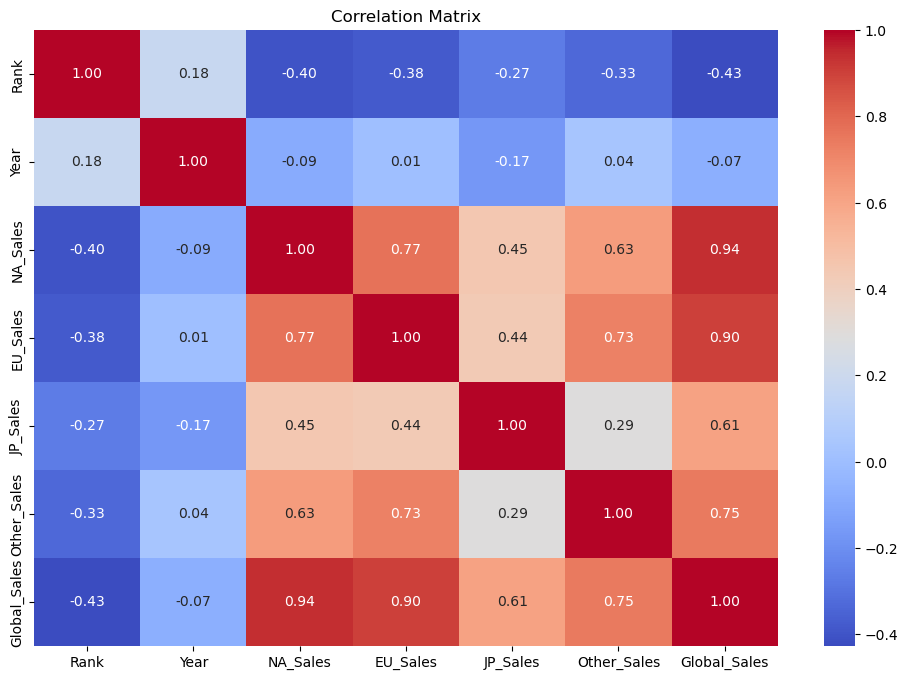

In [39]:
numerical_features = df_scaled.select_dtypes(include=[np.number])

corr_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


It seems that there are significant positive connections between "Global_Sales" and the regional sales columns ('NA_Sales,' EU_Sales,' JP_Sales,' Other_Sales,') based on the correlation matrix. Given that global sales are the total of sales from all regions, this is to be expected.

### **Model Training**

### Linear Regression 

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_categories = encoder.fit_transform(features[['Genre', 'Platform', 'Publisher']]).toarray()

categories = encoder.categories_
feature_names = []
for i, category in enumerate(['Genre', 'Platform', 'Publisher']):
    feature_names.extend([f"{category}_{cat}" for cat in categories[i]])

encoded_df = pd.DataFrame(encoded_categories, columns=feature_names)
features = features.join(encoded_df).drop(['Genre', 'Platform', 'Publisher'], axis=1)


In [ ]:
target = features['Global_Sales']
features = features.drop('Global_Sales', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)

test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
print("Testing Mean Squared Error:", test_mse)
print("Testing R-squared:", test_r2)

train_predictions = model.predict(X_train)

train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
print("\nTraining Mean Squared Error:", train_mse)
print("Training R-squared:", train_r2)


Testing Mean Squared Error: 2.422485225092017e+16
Testing R-squared: -3.875695772983288e+19

Training Mean Squared Error: 3.764046219658703e-09
Training R-squared: 0.9999871231707056


The testing set's unusually high Mean Squared Error (MSE) and negative R-squared value, in contrast to the training set's extremely low MSE and high R-squared value, imply that the model is overfitting the training set.

### **Random Forest Regressor**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_predictions_test = rf_model.predict(X_test)
rf_predictions_train = rf_model.predict(X_train)

test_mse = mean_squared_error(y_test, rf_predictions_test)
print("Testing Mean Squared Error:", test_mse)

test_r2 = r2_score(y_test, rf_predictions_test)
print("Testing R-squared:", test_r2)

train_mse = mean_squared_error(y_train, rf_predictions_train)
print("\nTraining Mean Squared Error:", train_mse)

train_r2 = r2_score(y_train, rf_predictions_train)
print("Training R-squared:", train_r2)


Testing Mean Squared Error: 0.00010098822904618105
Testing R-squared: 0.8384305306049968

Training Mean Squared Error: 2.0207101455569632e-07
Training R-squared: 0.999308713600224


The model performs well on the training set, explaining most variance. However, its performance on the test set is lower, indicating less predictive power. The large MSE difference suggests overfitting, suggesting further improvement through regularization techniques, feature engineering, or data collection.

### **Multi-Layer Perceptron**

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

mlp_model.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=42)

In [ ]:
mlp_predictions_test = mlp_model.predict(X_test)
mlp_predictions_train = mlp_model.predict(X_train)

test_mse = mean_squared_error(y_test, mlp_predictions_test)
test_r2 = r2_score(y_test, mlp_predictions_test)
train_mse = mean_squared_error(y_train, mlp_predictions_train)
train_r2 = r2_score(y_train, mlp_predictions_train)

print("Testing Mean Squared Error:", test_mse)
print("Testing R-squared:", test_r2)
print("\nTraining Mean Squared Error:", train_mse)
print("Training R-squared:", train_r2)

Testing Mean Squared Error: 5.452385212154809e-05
Testing R-squared: 0.9127681518940026

Training Mean Squared Error: 2.4015665508081562e-05
Training R-squared: 0.917842234900386


The model's performance is balanced between training and testing sets, with high R-squared values and low Mean Squared Error, indicating good generalization and not overfitting, despite significant variance in the target variable.

### **Fine-tuning MLP**
#### Changing the number and size of the hidden layers

In [ ]:
mlp_model1 = MLPRegressor(hidden_layer_sizes=(100, 50, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model1.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50, 50), max_iter=500, random_state=42)

In [ ]:
mlp1_predictions_test = mlp_model1.predict(X_test)
mlp1_predictions_train = mlp_model1.predict(X_train)

test_mse1 = mean_squared_error(y_test, mlp1_predictions_test)
print("Testing Mean Squared Error:", test_mse1)

test_r21 = r2_score(y_test, mlp1_predictions_test)
print("Testing R-squared:", test_r21)

train_mse1 = mean_squared_error(y_train, mlp1_predictions_train)
print("\nTraining Mean Squared Error:", train_mse1)

train_r21 = r2_score(y_train, mlp1_predictions_train)
print("Training R-squared:", train_r21)


Testing Mean Squared Error: 2.7535646300188402e-05
Testing R-squared: 0.9559461552679028

Training Mean Squared Error: 7.982645960276142e-06
Training R-squared: 0.972691310534074


The model's high R-squared value and low Mean Squared Error indicate accurate predictions and high variance in data. Its close performance metrics between training and testing sets suggest a well-fitting model, with accurate generalization to new data and close performance metrics between the two sets.

#### Changing the activation function to tanh

In [ ]:
mlp_model2 = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='adam', max_iter=500, random_state=42)

mlp_model2.fit(X_train, y_train)

MLPRegressor(activation='tanh', max_iter=500, random_state=42)

In [ ]:
mlp2_predictions_test = mlp_model2.predict(X_test)
mlp2_predictions_train = mlp_model2.predict(X_train)

test_mse2 = mean_squared_error(y_test, mlp2_predictions_test)
print("Testing Mean Squared Error:", test_mse2)

test_r22 = r2_score(y_test, mlp2_predictions_test)
print("Testing R-squared:", test_r22)

train_mse2 = mean_squared_error(y_train, mlp2_predictions_train)
print("\nTraining Mean Squared Error:", train_mse2)

train_r22 = r2_score(y_train, mlp2_predictions_train)
print("Training R-squared:", train_r22)


Testing Mean Squared Error: 3.9263557051445587e-05
Testing R-squared: 0.9371828564647714

Training Mean Squared Error: 4.0217243484683524e-05
Training R-squared: 0.8624165196647695


The model's high R-squared value in both testing and training sets indicates it explains a significant portion of the target variable's variance. The low Mean Squared Error and similar training and testing errors indicate accurate predictions and generalization without overfitting.


### Validating the predictions
#### Residual Plots

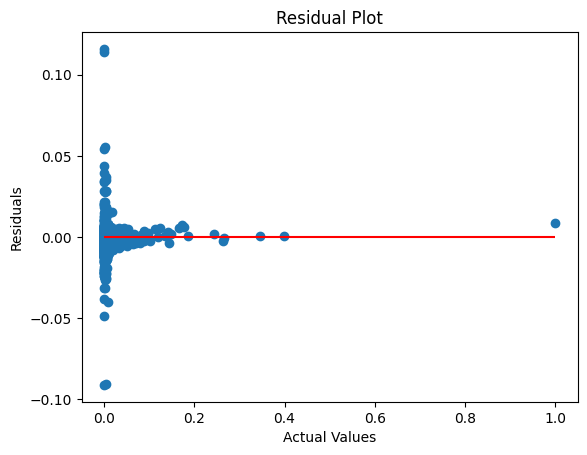

In [ ]:
residuals = y_test - mlp2_predictions_test
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


It's good to see that the majority of residuals are grouped around the horizontal line at zero in the residual plot. There is a pattern, nevertheless, that shows that larger positive residuals are correlated with very low actual values, suggesting that there may be a problem in forecasting very small sales figures.

#### Actual Values vs Predicted Values

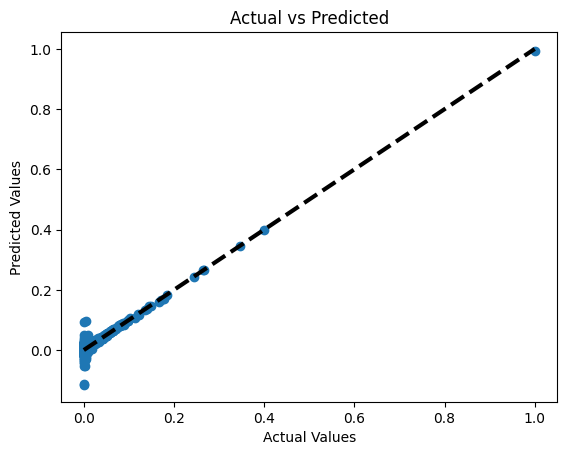

In [ ]:
plt.scatter(y_test, mlp2_predictions_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()


A strong linear relationship can be seen in the plot of real vs. projected, with the majority of the points falling near the dashed line, which stands for perfect forecasts. This shows that, although there is a little variation for smaller values, the model's predictions are generally fairly accurate across the data set.


### **Model Comparison**

| Metrics        | Linear Regression     | Random Forest Regressor | MLP                  | Fine-tuned MLP        |
|----------------|-----------------------|-------------------------|----------------------|-----------------------|
| Training MSE   | 3.764046219658703e-09 | 2.0207101455569632e-07  |2.4015665508081562e-05|4.0217243484683524e-05 |
| Testing MSE    | 2.422485225092017e+16 | 0.00010098822904618105  |5.452385212154809e-05 |3.9263557051445587e-05 |
| Training R2    | 0.9999871231707056    | 0.999308713600224       |0.917842234900386     |0.8624165196647695     |
| Testing R2     | -3.875695772983288e+19| 0.8384305306049968      |0.9127681518940026    |0.9371828564647714     |

### **Overall Comparison:**
- The **Linear Regression Model** demonstrates severe overfitting.
- The **Random Forest Regressor Model** indicates overfitting but has good potential with proper tuning.
- The **MLP Regressor Model** shows balanced performance, suggesting good generalization.
- The **Fine-tuned MLP Regressor Model** performs well, with high R-squared values and low MSE, indicating accurate predictions and generalization.

#### **Model Selected:** Fine-tuned MLP Regressor Model